In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_json('result.json',lines=True)

In [3]:
df = df.drop(df.index[-1])

<AxesSubplot:>

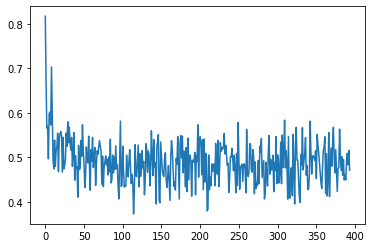

In [42]:
df['info'].apply(lambda x: x['learner']['default_policy']['learner_stats']['mean_td_error']).plot()

In [51]:
x = df['episode_reward_mean'].rolling(window=10).mean().rolling(window=50).std()

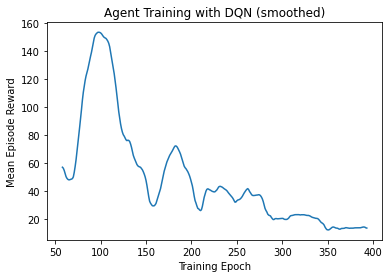

In [52]:
plt.plot(x)
plt.ylabel('Mean Episode Reward')
plt.xlabel('Training Epoch')
plt.title('Agent Training with DQN (smoothed)')
plt.savefig('training_results.png')

In [5]:
rand_rewards = pd.Series(pickle.load(open('Random_rewards.pkl', "rb")))
rand_lengths = pd.Series(pickle.load(open('Random_lengths.pkl', "rb")))
DQN_rewards = pd.Series(pickle.load(open('DQN_rewards.pkl', "rb")))
DQN_lengths = pd.Series(pickle.load(open('DQN_lengths.pkl', "rb")))
heuristic_rewards = pd.Series(pickle.load(open('heuristic_rewards.pkl', "rb")))
heuristic_lengths = pd.Series(pickle.load(open('heuristic_lengths.pkl', "rb")))
no_defense_rewards = pd.Series(pickle.load(open('NoDefense_rewards.pkl', "rb")))
no_defense_lengths = pd.Series(pickle.load(open('NoDefense_lengths.pkl', "rb")))

window_size = 25
DQN_rewards_x = DQN_rewards.rolling(window=window_size).mean().dropna()
DQN_lengths_x = DQN_lengths.rolling(window=window_size).mean().dropna()
rand_rewards_x = rand_rewards.rolling(window=window_size).mean().dropna()
rand_lengths_x = rand_lengths.rolling(window=window_size).mean().dropna()
heuristic_rewards_x = heuristic_rewards.rolling(window=window_size).mean().dropna()
heuristic_lengths_x = heuristic_lengths.rolling(window=window_size).mean().dropna()
no_defense_rewards_x = no_defense_rewards.rolling(window=window_size).mean().dropna()
no_defense_lengths_x = no_defense_lengths.rolling(window=window_size).mean().dropna()

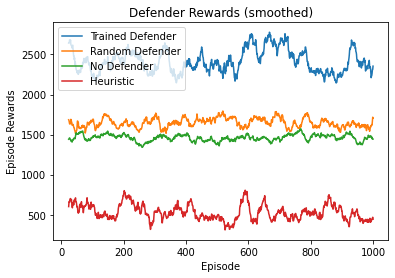

In [6]:
plt.plot(DQN_rewards_x,label = 'Trained Defender')
plt.plot(rand_rewards_x,label = 'Random Defender')
plt.plot(no_defense_rewards_x,label = 'No Defender')
plt.plot(heuristic_rewards_x,label = 'Heuristic')

plt.legend(loc='upper left')
plt.ylabel('Episode Rewards')
plt.xlabel('Episode')
plt.title('Defender Rewards (smoothed)')
plt.savefig('episode_rewards_comparisons.png')

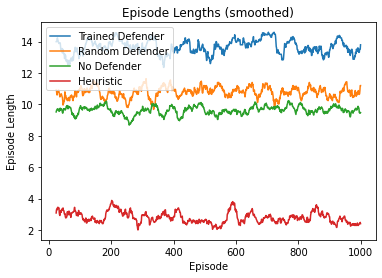

In [7]:
fig, ax = plt.subplots()
plt.plot(DQN_lengths_x,label = 'Trained Defender')
plt.plot(rand_lengths_x,label = 'Random Defender')
plt.plot(no_defense_lengths_x,label = 'No Defender')
plt.plot(heuristic_lengths_x,label = 'Heuristic')

plt.legend(loc='upper left')
plt.ylabel('Episode Length')
plt.xlabel('Episode')
plt.title('Episode Lengths (smoothed)')
plt.savefig('episode_length_comparison.png')